# Trends & state-level patterns in U.S. disaster declarations (1953-2023)

## Objective

The objective of this project is to conduct a comprehensive analysis of FEMA disaster declarations in the United States in order to identify long-term yearly trends, uncover seasonal patterns, assess state-level disaster activity, and evaluate the utilization of key FEMA assistance programs. By examining how disasters and program declarations vary across time, geography, and hazard type, this project aims to provide data-driven insights that can support improved disaster preparedness, more effective resource allocation, and enhanced mitigation planning in high-risk regions.

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading


In [15]:
# load data
data = pd.read_csv(r"C:\Users\sanas\Desktop\Public health projects\Datasets\us_disaster_declarations.csv")
data.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [16]:
# overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [17]:
# display shape of data
data.shape

(64092, 23)

In [18]:
# display column names
data.columns

Index(['fema_declaration_string', 'disaster_number', 'state',
       'declaration_type', 'declaration_date', 'fy_declared', 'incident_type',
       'declaration_title', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'incident_begin_date',
       'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'last_ia_filing_date',
       'last_refresh', 'hash', 'id'],
      dtype='object')

Column Explanations:

1. fema_declaration_string :Full FEMA declaration code (e.g., DR-1234). Identifies the disaster declaration.


2. disaster_number : Numeric ID assigned to each disaster event (unique per disaster).

3. state: U.S. state or territory affected by the disaster.

4. declaration_type: Type of FEMA declaration (e.g., DR = Disaster, EM = Emergency).

5. declaration_date: Date FEMA officially declared the disaster.

6. fy_declared: Fiscal year in which the disaster was declared.

7. incident_type: Type of disaster (e.g., Flood, Hurricane, Wildfire).

8. declaration_title: Short title describing the disaster.

9. ih_program_declared: Indicates if Individual Housing Assistance was approved (1/0).

10. ia_program_declared: Indicates if Individual Assistance was approved (1/0).

11. pa_program_declared: Indicates if Public Assistance was approved (1/0).

12. hm_program_declared: Indicates if Hazard Mitigation funding was approved (1/0).

13. incident_begin_date: Date when the disaster event started.

14. incident_end_date: Date when the disaster event ended.

15. disaster_closeout_date: Date when FEMA officially closed the disaster case.

16. fips: Federal county code for identifying geographic areas.

17. place_code: FEMA-specific code for smaller regions (e.g., cities/tribal areas).

18. designated_area: Name of the specific area eligible for FEMA assistance.

19. declaration_request_number: Internal ID for FEMA’s request/approval process.

20. last_ia_filing_date: Last date individuals could apply for Individual Assistance.

21. last_refresh: Date the dataset was last updated by FEMA.

22. hash: System-generated checksum to track data changes.

23. id: Internal system ID used by FEMA’s database.

## Data Cleaning

In [19]:
# check for duplicated

In [20]:
data.duplicated().sum()

0

In [21]:
# check for missing data
data.isnull().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8410
disaster_closeout_date        15180
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
last_ia_filing_date           46339
last_refresh                      0
hash                              0
id                                0
dtype: int64

columns 'last_ia_filing_date' and 'disaster_closeout_date' may be deleted later because include too much missing data.

In [22]:
# drop the columns 'last_ia_filing_date' and 'disaster_closeout_date'
data = data.drop(columns=['last_ia_filing_date', 'disaster_closeout_date'])

In [23]:
# Convert Date Columns to Proper Datetime Format

In [24]:
date_columns = ['declaration_date', 'incident_begin_date', 'incident_end_date']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

In [12]:
# Clean and Standardize Text Columns

In [25]:
# Trim whitespace and Ensure consistent formatting for: state, incident_type, declaration_type and declaration_title.

# convert state to string, strip and uppercase 
if "state" in data.columns:
    data["state"] = data["state"].astype(str).str.strip().str.upper()

 # convert incident_type to string, strip and Convert to title case
if "incident_type" in data.columns:
    data["incident_type"] = data["incident_type"].astype(str).str.strip().str.title()

#    convert state to string, strip and uppercase
if "declaration_type" in data.columns:
    data["declaration_type"] = data["declaration_type"].astype(str).str.strip().str.upper()

    # convert declaration title to string and strip
if "declaration_title" in data.columns:
    data["declaration_title"] = data["declaration_title"].astype(str).str.strip()


In [14]:
# Drop unnecessary columns

In [26]:
cols_to_drop = ['hash', 'id', 'place_code']
data = data.drop(columns=[c for c in cols_to_drop if c in data.columns], errors='ignore')


In [28]:
# data after cleaning
data.tail(30)

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,incident_begin_date,incident_end_date,fips,designated_area,declaration_request_number,last_refresh
64062,EM-3592-CA,3592,CA,EM,2023-03-10 00:00:00+00:00,2023,Flood,"Severe Winter Storms, Flooding, Landslides, An...",0,0,1,0,2023-03-09 00:00:00+00:00,NaT,6107,Tulare (County),23021,2023-03-18T13:22:03Z
64063,EM-3592-CA,3592,CA,EM,2023-03-10 00:00:00+00:00,2023,Flood,"Severe Winter Storms, Flooding, Landslides, An...",0,0,1,0,2023-03-09 00:00:00+00:00,NaT,6109,Tuolumne (County),23021,2023-03-18T13:22:03Z
64064,EM-3592-CA,3592,CA,EM,2023-03-10 00:00:00+00:00,2023,Flood,"Severe Winter Storms, Flooding, Landslides, An...",0,0,1,0,2023-03-09 00:00:00+00:00,NaT,6115,Yuba (County),23021,2023-03-18T13:22:03Z
64065,DR-4694-NY,4694,NY,DR,2023-03-15 00:00:00+00:00,2023,Snowstorm,Severe Winter Storm And Snowstorm,0,0,1,1,2022-12-23 00:00:00+00:00,2022-12-28 00:00:00+00:00,36037,Genesee (County),23017,2023-03-18T13:22:03Z
64066,DR-4694-NY,4694,NY,DR,2023-03-15 00:00:00+00:00,2023,Snowstorm,Severe Winter Storm And Snowstorm,0,0,1,1,2022-12-23 00:00:00+00:00,2022-12-28 00:00:00+00:00,36089,St. Lawrence (County),23017,2023-03-18T13:22:03Z
64067,DR-4694-NY,4694,NY,DR,2023-03-15 00:00:00+00:00,2023,Snowstorm,Severe Winter Storm And Snowstorm,0,0,1,1,2022-12-23 00:00:00+00:00,2022-12-28 00:00:00+00:00,36103,Suffolk (County),23017,2023-03-18T13:22:03Z
64068,DR-4694-NY,4694,NY,DR,2023-03-15 00:00:00+00:00,2023,Snowstorm,Severe Winter Storm And Snowstorm,1,0,1,1,2022-12-23 00:00:00+00:00,2022-12-28 00:00:00+00:00,36029,Erie (County),23017,2023-03-18T13:22:03Z
64069,DR-4694-NY,4694,NY,DR,2023-03-15 00:00:00+00:00,2023,Snowstorm,Severe Winter Storm And Snowstorm,1,0,1,1,2022-12-23 00:00:00+00:00,2022-12-28 00:00:00+00:00,36063,Niagara (County),23017,2023-03-18T13:22:03Z
64070,DR-4693-NH,4693,NH,DR,2023-03-15 00:00:00+00:00,2023,Severe Storm,Severe Storm And Flooding,0,0,1,1,2022-12-22 00:00:00+00:00,2022-12-25 00:00:00+00:00,33001,Belknap (County),23015,2023-03-18T13:22:03Z
64071,DR-4693-NH,4693,NH,DR,2023-03-15 00:00:00+00:00,2023,Severe Storm,Severe Storm And Flooding,0,0,1,1,2022-12-22 00:00:00+00:00,2022-12-25 00:00:00+00:00,33003,Carroll (County),23015,2023-03-18T13:22:03Z


In [29]:
## Save the data cleaned

In [31]:
output_path = "C:\\Users\\sanas\\Desktop\\Public health projects\\fema.csv"

data.to_csv(output_path, index=False)

## Data Exploration

In [ ]:
# Display Unique values and counts

In [32]:
# Unique values and counts
categorical_cols = ['state', 'declaration_type', 'incident_type', 'fema_declaration_string']
for col in categorical_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts())
    print("\n")


--- state ---
state
TX    5173
MO    2704
KY    2583
VA    2524
LA    2493
OK    2474
FL    2352
GA    2278
NC    2096
PR    1987
MS    1906
IA    1848
KS    1759
AL    1665
TN    1605
CA    1599
AR    1593
MN    1563
NY    1503
NE    1485
IN    1451
SD    1430
ND    1359
IL    1283
OH    1281
PA    1239
WV    1232
ME    1019
WA     979
SC     947
WI     892
MI     796
CO     646
NJ     625
MT     605
OR     586
NM     514
MD     448
MA     398
ID     361
VT     338
AZ     335
AK     318
NH     301
NV     274
CT     255
UT     249
WY     128
RI     114
HI     100
VI      80
AS      76
MP      63
DE      53
MH      53
FM      31
DC      23
GU      19
PW       1
Name: count, dtype: int64


--- declaration_type ---
declaration_type
DR    43265
EM    18956
FM     1871
Name: count, dtype: int64


--- incident_type ---
incident_type
Severe Storm         17490
Hurricane            13045
Flood                10693
Biological            7857
Snowstorm             3707
Fire                  3615

In [34]:
# program declarations
program_cols = ['ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared']
for col in program_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts())
    print("\n")


--- ih_program_declared ---
ih_program_declared
0    53319
1    10773
Name: count, dtype: int64


--- ia_program_declared ---
ia_program_declared
0    46905
1    17187
Name: count, dtype: int64


--- pa_program_declared ---
pa_program_declared
1    59736
0     4356
Name: count, dtype: int64


--- hm_program_declared ---
hm_program_declared
0    36437
1    27655
Name: count, dtype: int64




In [33]:
# numerical columns
numerical_cols = ['fy_declared', 'disaster_number']
print(data[numerical_cols].describe())


        fy_declared  disaster_number
count  64092.000000     64092.000000
mean    2004.339996      2577.105364
std       14.785293      1405.535733
min     1953.000000         1.000000
25%     1997.000000      1316.000000
50%     2007.000000      3057.000000
75%     2018.000000      3546.000000
max     2023.000000      5457.000000


In [34]:
# Visualizations

In [35]:
# Number of Disaster Declarations by Fiscal Year


C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


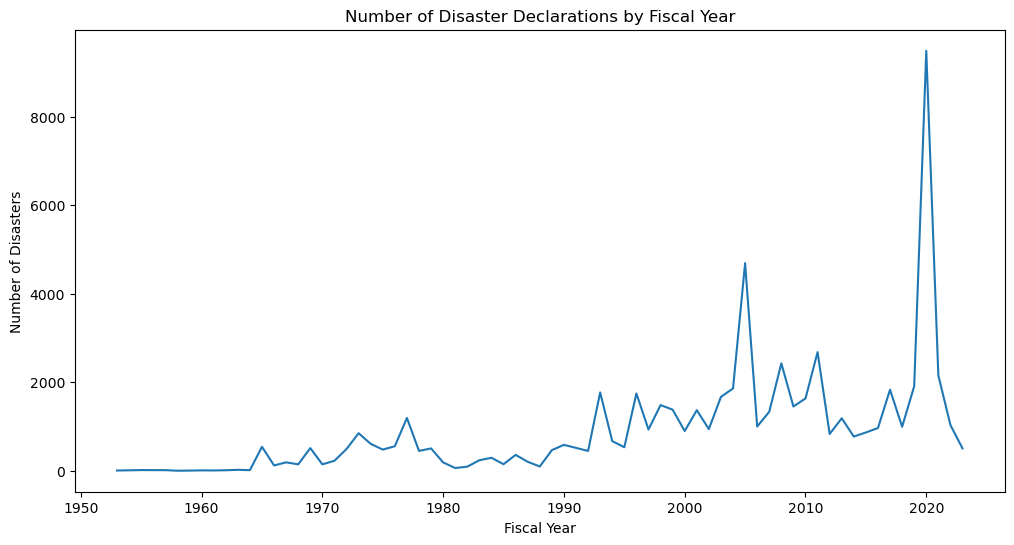

In [36]:
# Disasters per fiscal year
year_counts = data['fy_declared'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Disaster Declarations by Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Disasters")
plt.show()


The line plot highlights the number of disaster declarations from 1953 to 2023. 
- Disasters are stable and relatively low from 1950 to mid-1970. 
- Starting from 1970, there is a clear upward shift. 
- After 1990, the baseline is much higher than earlier decades. This long term increase may be due to increased frequency or severity of disasters, population growth in high risk areas, changes in FEMA disaster declarations policies or better documentation and reporting. 
- There are notable spikes around 2005 (Hurricane Katrina, Rita, Wilma), in early 2010s with Hurricane Sandy (2012), major tornado outbreaks and a peak in 2020 because of the nationwide major disaster COVID-19.

In [ ]:
# Total Disaster Declarations by Month (Across All Years)

In [61]:
# Create a Month column
data['month'] = data['declaration_date'].dt.month_name()

# Create a categorical month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

monthly_counts = data['month'].value_counts().reindex(month_order)
print(monthly_counts)



month
January       5054
February      4515
March        11051
April         6270
May           4687
June          4753
July          4645
August        5103
September    10667
October       3750
November      1574
December      2023
Name: count, dtype: int64


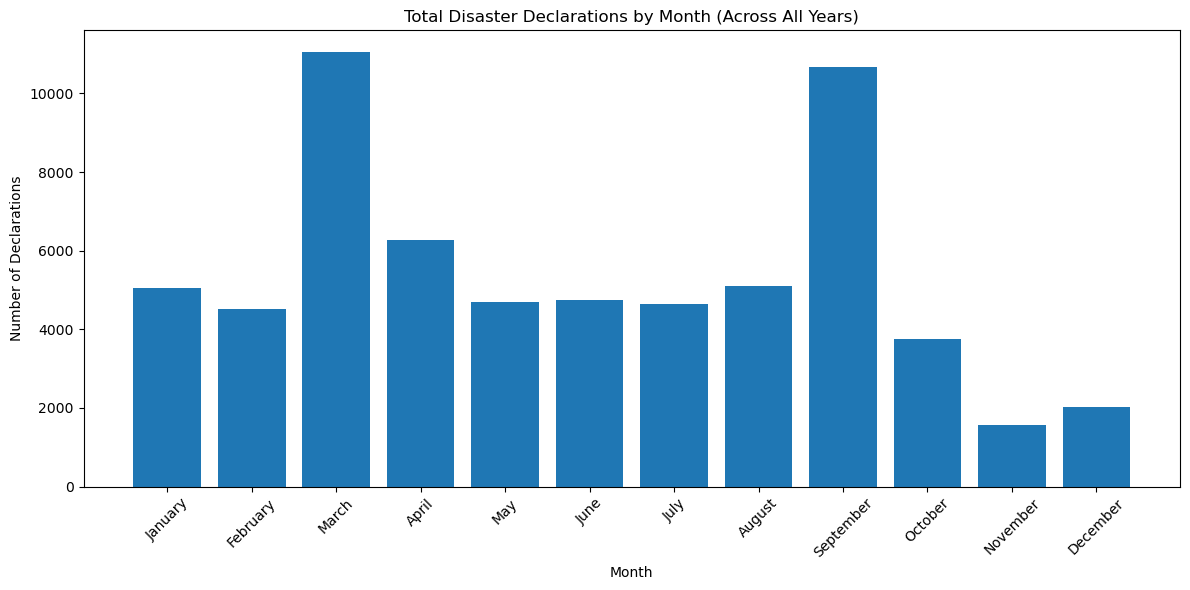

In [62]:
# plotting
plt.figure(figsize=(12,6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.title("Total Disaster Declarations by Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Declarations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The disasters exist during all the months of the year. The highest disaster activity months are notably March and September, because associated with spring severe weather and peak hurricane season, while the quitest months are November and December indicating a clear drop-off in the disaster activity toward the end of the year. All the other months (January, February, April,  May, June, July, August and October) show moderate levels of declarations indicating a broad distribution of disaster types. 

In [37]:
# Disaster Types by State

In [38]:
# Disaster types per state
state_disaster = data.groupby('state')['incident_type'].value_counts().unstack().fillna(0)
print(state_disaster)

incident_type  Biological  Chemical  Coastal Storm  Dam/Levee Break  Drought  \
state                                                                          
AK                  121.0       0.0            2.0              0.0      0.0   
AL                  139.0       0.0            0.0              0.0     67.0   
AR                  152.0       0.0            0.0              0.0     32.0   
AS                   10.0       0.0            0.0              0.0      5.0   
AZ                   73.0       0.0            0.0              0.0      8.0   
CA                  116.0       0.0           43.0              5.0     47.0   
CO                  132.0       0.0           64.0              1.0     42.0   
CT                   21.0       0.0            0.0              0.0      0.0   
DC                    2.0       0.0            0.0              0.0      0.0   
DE                    6.0       0.0            1.0              0.0      3.0   
FL                  150.0       0.0     

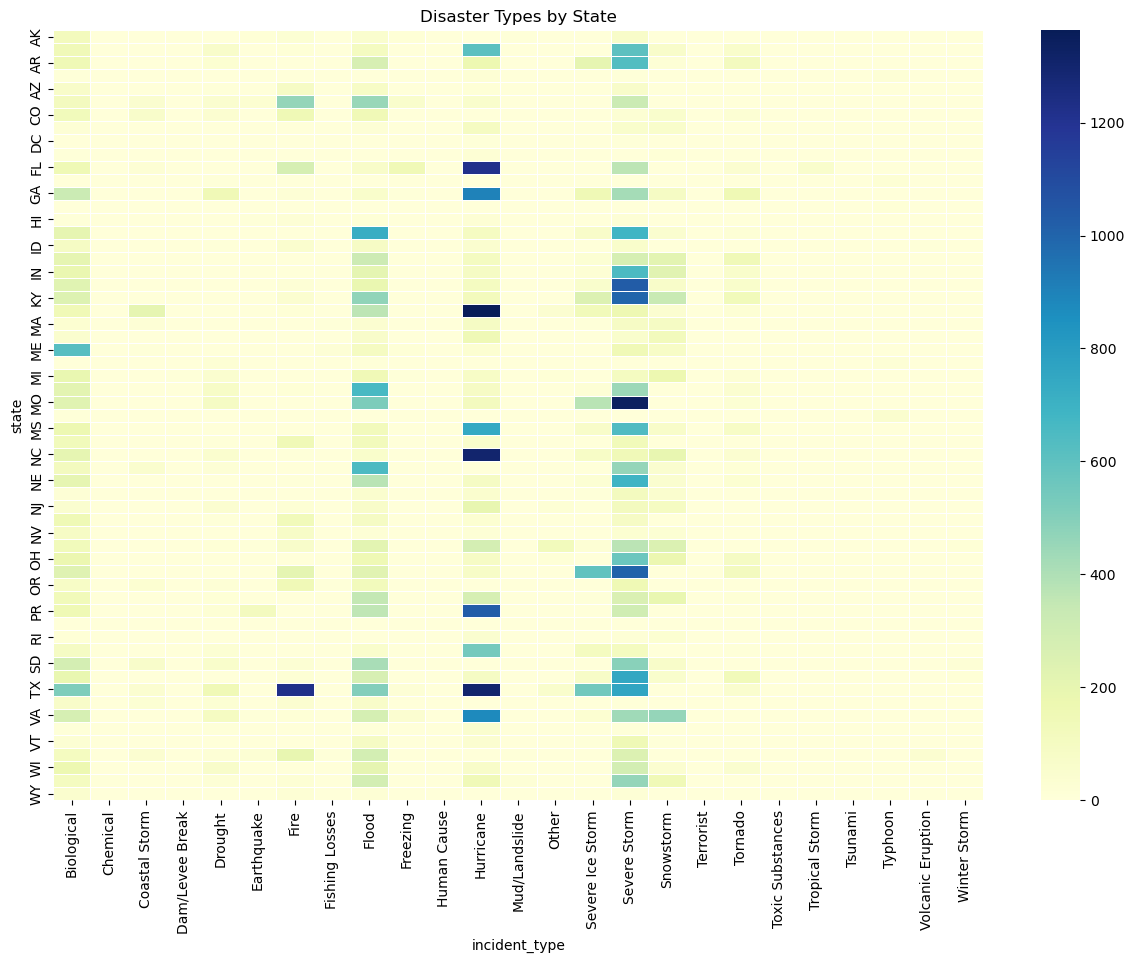

In [39]:
# Heatmap of disaster counts by state and type
plt.figure(figsize=(15,10))
sns.heatmap(state_disaster, cmap="YlGnBu", linewidths=.5)
plt.title("Disaster Types by State")
plt.show()

The plot indicates that severe storms, hurricanes, and floods occur frequently across most U.S. states, with particularly high concentrations in Texas (TX), Missouri (MO), North Carolina (NC), Kentucky (KY), and Florida (FL). Wildfires appear most common in Texas and occur at moderate levels in Arizona (AZ). 


In [40]:
# Number of Program Declarations by State

In [41]:
program_cols = ['ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared']

# Group by state and sum the programs (assuming 1 for declared, 0 for not)
state_programs = data.groupby('state')[program_cols].sum().sort_values('pa_program_declared', ascending=False)
print(state_programs)


       ih_program_declared  ia_program_declared  pa_program_declared  \
state                                                                  
TX                     761                  918                 4652   
KY                     502                  702                 2431   
MO                     528                  833                 2430   
OK                     359                  532                 2377   
VA                     298                  655                 2374   
LA                     413                  654                 2313   
GA                     324                  477                 2186   
FL                     458                  717                 2114   
NC                     371                  420                 1989   
PR                     423                  681                 1895   
KS                     183                  350                 1723   
IA                     334                  765                 

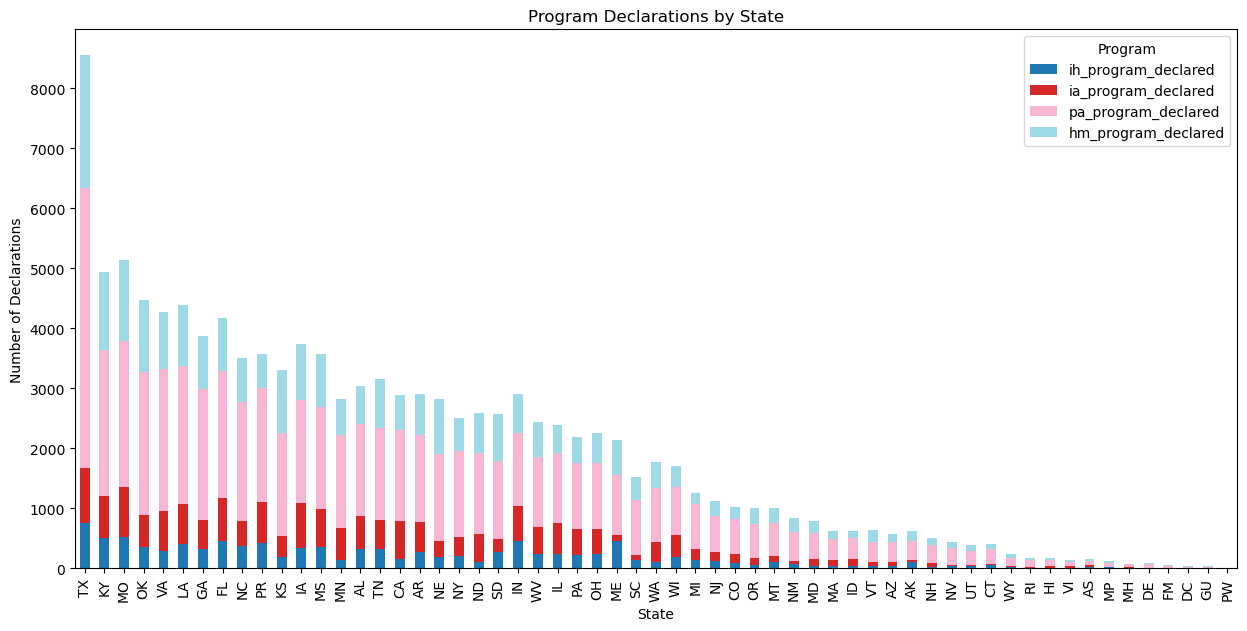

In [42]:
# plotting
state_programs.plot(kind='bar', stacked=True, figsize=(15,7), colormap='tab20')
plt.title("Program Declarations by State")
plt.xlabel("State")
plt.ylabel("Number of Declarations")
plt.legend(title="Program")
plt.show()



- The largest section in nearly every state is public assistance (PA). This means that most FEMA declarations are for repairing public infrastructure after disasters. Hazard mitigation (HM) is also significant across all the US states suggesting important long-term mitigation investment. Individual assistance (IA) and individual housing assistance (IH) are much smaller.

- Texas has the highest total number of disaster program declarations. It is the disaster hotspot.

- Kentucky (KY), Missouri (MO), Oklahoma (OK), VA, LA, GA, FL, NC, PR, IA and MS also rank very high. 
 

- MN, AL, TN, CA, AR, NE, NY, ND, SD, IN, WV, IL, PA, OH, ME show moderate disaster declarations. Surprisingly, states like California (CA) show moderate totals. This is because FEMA declarations do not include all wildfire events unless they meet federal disaster criteria and Many wildfire responses are handled at the state level.

- All other states show few totals, maybe because they have Smaller populations so fewer eligible programs, Less frequent large-scale disasters and Some territories may receive assistance through different mechanisms.

In [43]:
# Program declarations by disaster type

In [44]:

# Program declaration columns
program_cols = ['ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared']

# Count of Program Declarations per Disaster Type
disaster_programs = data.groupby('incident_type')[program_cols].sum().sort_values('pa_program_declared', ascending=False)
print("=== Count of Program Declarations by Disaster Type ===")
print(disaster_programs)




=== Count of Program Declarations by Disaster Type ===
                   ih_program_declared  ia_program_declared  \
incident_type                                                 
Severe Storm                      3711                 5823   
Hurricane                         1774                 2234   
Flood                              628                 6511   
Biological                        4115                    0   
Snowstorm                            2                   51   
Fire                               167                  350   
Severe Ice Storm                   177                  287   
Drought                              0                   61   
Tornado                            110                 1205   
Coastal Storm                        0                  145   
Other                                2                    9   
Earthquake                          59                   69   
Typhoon                             18                   75   


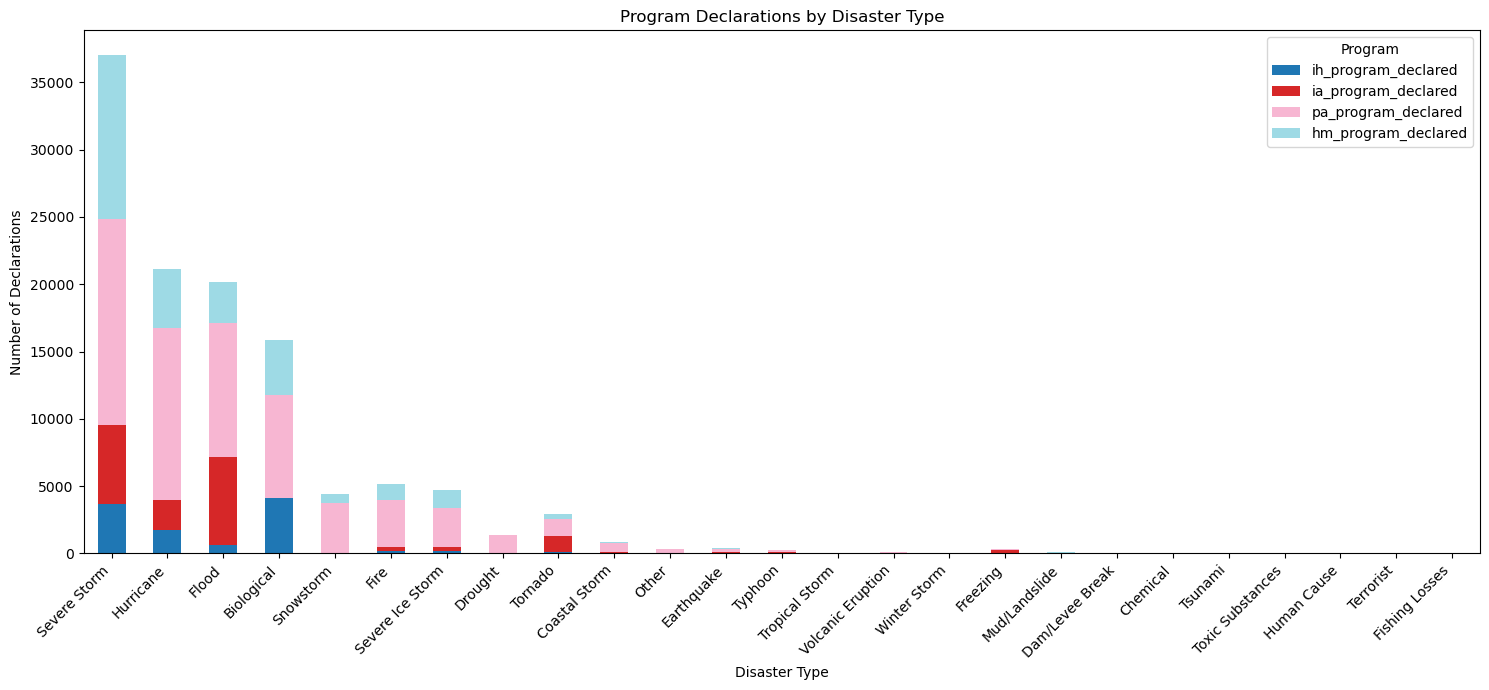

In [45]:
# Stacked Bar Chart of Program Declarations by Disaster Type
disaster_programs.plot(kind='bar', stacked=True, figsize=(15,7), colormap='tab20')
plt.title("Program Declarations by Disaster Type")
plt.xlabel("Disaster Type")
plt.ylabel("Number of Declarations")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Program")
plt.tight_layout()
plt.show()



Severe storms represent the most frequently declared disaster type in the United States, followed by hurricanes, floods. These categories often exceed state-level response capacities, leading to a higher number of federal disaster declarations.

Wildfires, snowstorms, and tornadoes are declared at a moderate level, reflecting the varying ability of states to manage them independently.

Other disaster types—including coastal storms, earthquakes, typhoons, droughts, and freezing events—are rarely declared. This may be due to their lower occurrence and/or the fact that states are generally able to manage these events without requiring federal assistance.


=== Percentage of Disasters Declaring Each Program by Disaster Type ===
                   ih_program_declared  ia_program_declared  \
incident_type                                                 
Biological                        52.4                  0.0   
Chemical                           0.0                  0.0   
Coastal Storm                      0.0                 22.8   
Dam/Levee Break                   38.5                  7.7   
Drought                            0.0                  4.7   
Earthquake                        25.9                 30.3   
Fire                               4.6                  9.7   
Fishing Losses                     0.0                100.0   
Flood                              5.9                 60.9   
Freezing                           0.0                 88.7   
Human Cause                        0.0                 14.3   
Hurricane                         13.6                 17.1   
Mud/Landslide                     10.8       

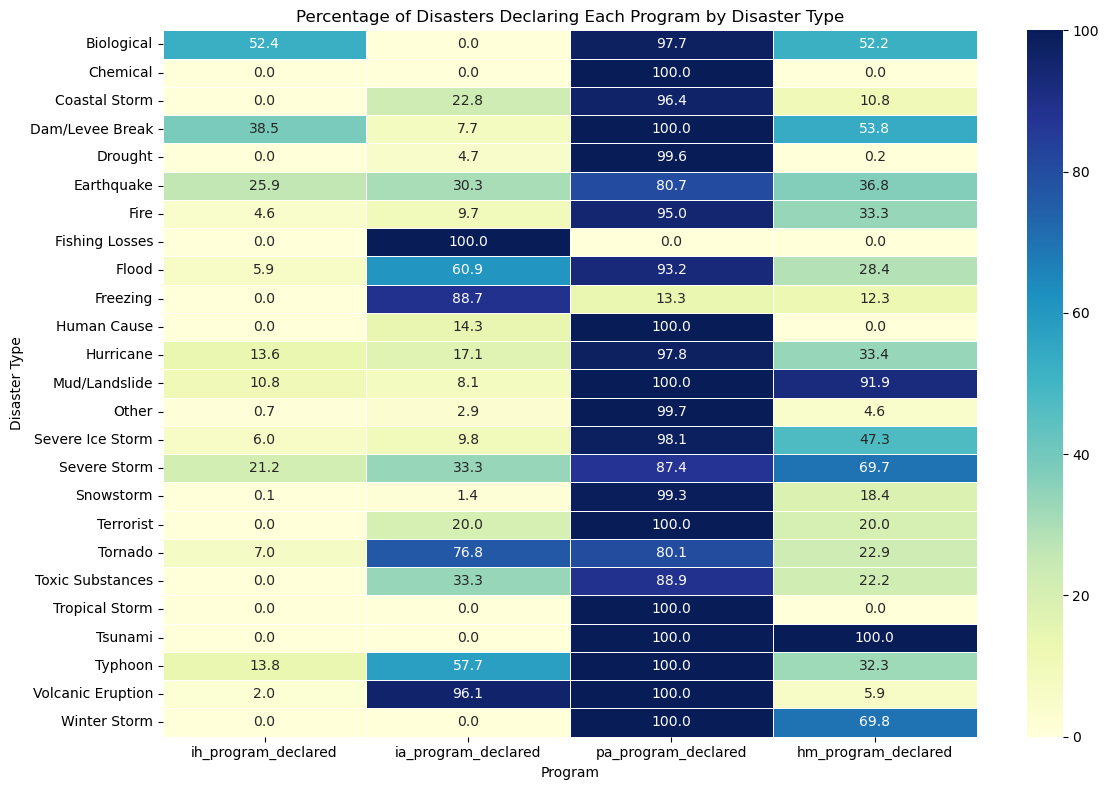

In [46]:
# Percentage of Disasters with Program Declarations per Disaster Type
# Total disasters per disaster type
disaster_totals = data.groupby('incident_type').size()

# Calculate percentage
disaster_program_pct = disaster_programs.div(disaster_totals, axis=0) * 100

print("\n=== Percentage of Disasters Declaring Each Program by Disaster Type ===")
print(disaster_program_pct.round(1))

# Heatmap of Percentages
plt.figure(figsize=(12,8))
sns.heatmap(disaster_program_pct, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Percentage of Disasters Declaring Each Program by Disaster Type")
plt.xlabel("Program")
plt.ylabel("Disaster Type")
plt.tight_layout()
plt.show()


We can clearly observe a consistently high demand for Public Assistance across nearly all disaster types, indicating the broad need for infrastructure repair and community recovery support. Hazard Mitigation assistance is requested most frequently for mudslides/landslides, tsunamis, and severe storms, reflecting long-term efforts to reduce future risks from these hazards. Individual Assistance shows particularly high demand in cases of fishing losses, floods, freezing events, tornadoes, volcanic eruptions, and typhoons, where direct impacts on households and personal livelihoods are most significant.

## Final Analysis

#### Long-term trends
The data shows a clear long-term increase in disaster declarations from 1953 to 2023. Major spikes occur around 2005 due to Hurricane Katrina, Rita, and Wilma; in 2012 following Hurricane Sandy; and in 2020 due to COVID-19.

#### Seasonal patterns
Disasters occur throughout the year, but activity peaks in March and September, corresponding to spring severe weather and peak hurricane season. The quietest months are November and December, reflecting a seasonal decline in major climate hazards. The remaining months show moderate levels of disaster declarations, consistent with broad climate variability across the U.S.

#### State-level analysis

- Texas has the highest total number of disaster program declarations. It is the disaster hotspot.

- Kentucky (KY), Missouri (MO), Oklahoma (OK), VA, LA, GA, FL, NC, PR, IA and MS also rank very high. 
 
- MN, AL, TN, CA, AR, NE, NY, ND, SD, IN, WV, IL, PA, OH, ME show moderate disaster declarations. Surprisingly, states like California (CA) show moderate totals. This is because FEMA declarations do not include all wildfire events unless they meet federal disaster criteria and Many wildfire responses are handled at the state level.

- All other states show few totals, maybe because they have Smaller populations so fewer eligible programs, Less frequent large-scale disasters and Some territories may receive assistance through different mechanisms.

#### Disaster-level analysis
Disaster types are highly diverse across the U.S. Severe storms, hurricanes, and floods are the most frequent hazards, particularly concentrated in Texas, Missouri, North Carolina, Kentucky, and Florida. Wildfires appear most prominently in Texas and at moderate levels in Arizona. Tornadoes, snowstorms, freezing events show moderate declaration levels.
Rarer declarations include coastal storms, earthquakes, drought, volcanic eruptions, and typhoons—either because they occur less often or states manage them independently.  

#### Program declarations analysis
Public Assistance (PA) shows consistently high demand across nearly all disaster types, demonstrating the widespread need for repairing infrastructure, utilities, and public facilities. Hazard Mitigation (HM) is most frequently requested for mudslides/landslides, tsunamis, and severe storms, reflecting efforts to reduce long-term vulnerability. Individual Assistance (IA) peaks during events that directly affect households — fishing losses, floods, freezing events, tornadoes, volcanic eruptions, and typhoons.



## Recommendations



Based on the analysis, the following recommendations can strengthen disaster response and preparedness:

#### 1. Prioritize additional funding and resources for high-risk states

States with consistently high FEMA activity — Texas, Kentucky, Missouri, Oklahoma, Virginia, Louisiana, Georgia, Florida, and North Carolina — should receive increased support for:

- Infrastructure hardening

- Emergency management training

- Community resilience programs

These states represent the largest share of recurring federal assistance needs.

#### 2. Optimize Public Assistance (PA) delivery

Since PA is the most frequently used program across nearly all disaster types, FEMA should:

- Improve processing efficiency

- Expand pre-disaster planning with state/local governments

- Modernize infrastructure assessment tools

This will reduce recovery time and costs.

#### 3. Strengthen Hazard Mitigation (HM) investments in the most vulnerable hazard zones

Given that HM is most needed for Severe storms, Mudslides/landslides, Tsunamis and that certain states repeatedly experience these hazards, FEMA should:

- Increase HM funding in high-exposure regions

- Support long-term, community-level risk-reduction projects

- Expand early-warning and monitoring systems

These investments will reduce future federal disaster spending.

#### 4. Prepare targeted seasonal readiness plans before March and September

Because March and September show the highest disaster declarations, FEMA and states should intensify seasonal preparedness during these months:

- Pre-position supplies, personnel, and shelters in high-risk regions

- Increase public communication campaigns before peak months

This improves rapid response and reduces the impact of predictable seasonal hazards.


#### 5. Review and enhance assistance for rural, small-population, and island territories

Low declaration counts in these areas may mask unmet needs. FEMA should:

- Assess whether these regions receive adequate assistance

- Improve outreach and application support

- Strengthen coordination with local governments and territorial agencies

This ensures equitable access to federal disaster support.

#### 6. Establish a long-term strategy for recurring hazards

Since storms, floods, tornadoes, and hurricanes dominate declarations:

- FEMA should expand multi-year resilience planning in repeatedly affected regions.

- States should establish data-driven risk reduction strategies using historical disaster trends.